<a href="https://colab.research.google.com/github/Mr-nvk/svm-practice/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ex6data1.mat to ex6data1.mat
Saving ex6data2.mat to ex6data2.mat
Saving ex6data3.mat to ex6data3.mat
Saving spamTest.mat to spamTest.mat
Saving spamTrain.mat to spamTrain.mat


In [0]:
data1 = loadmat("ex6data1.mat")
data2 = loadmat("ex6data2.mat")
data3 = loadmat("ex6data3.mat")
spam_train = loadmat("spamTrain.mat")
spam_test = loadmat("spamTest.mat")

In [0]:
def plotdata(X, Y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
  plt.rcParams["figure.figsize"] = (20.,14.)
  
  pos = Y[:,0] == 1
  neg = Y[:,0] == 0
  
  if axes == None:
    axes = plt.gca()
    
  axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
  axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
  axes.set_xlim([xmin, xmax])
  axes.set_ylim([ymin, ymax])
  axes.set_xlabel(xlabel, fontsize=12)
  axes.set_ylabel(ylabel, fontsize=12)
  
  axes.legend(bbox_to_anchor=(1,1), fancybox=True)

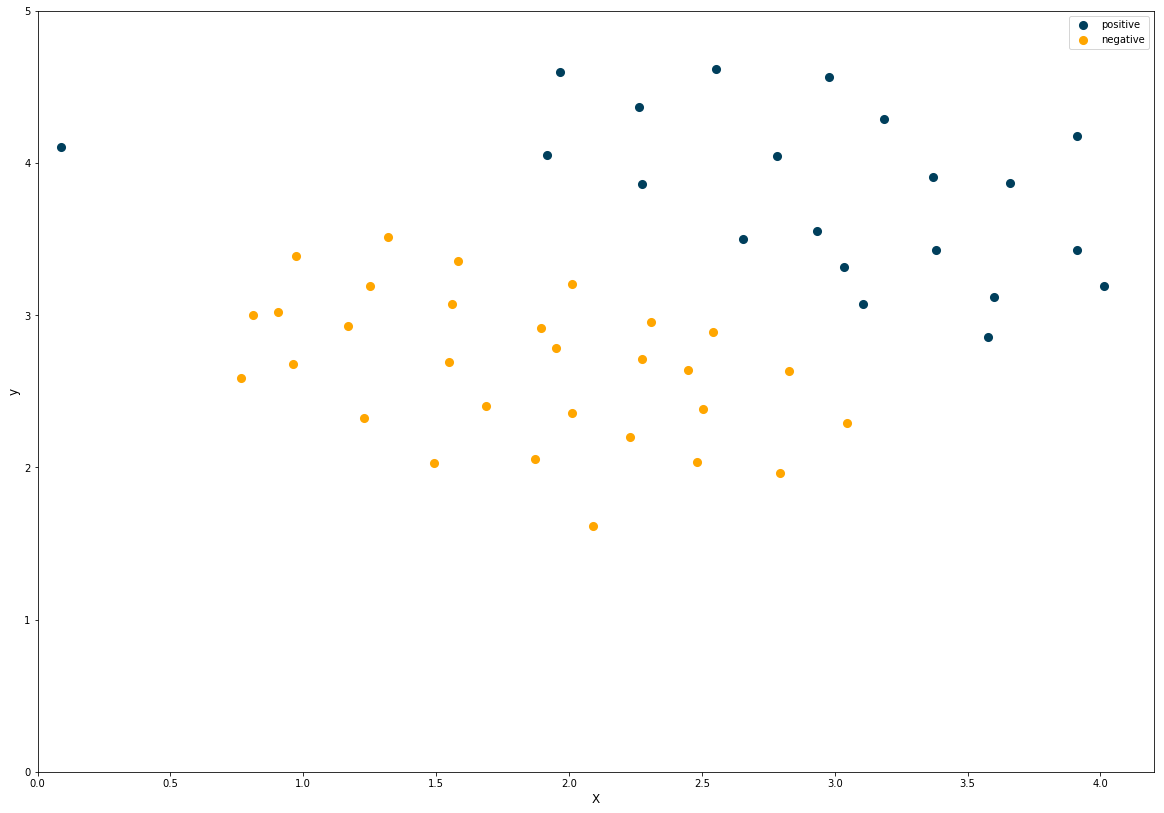

In [5]:
X = data1["X"]
Y = data1["y"]



plotdata(X, Y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)



**SVM  with small regularization (c=1)**

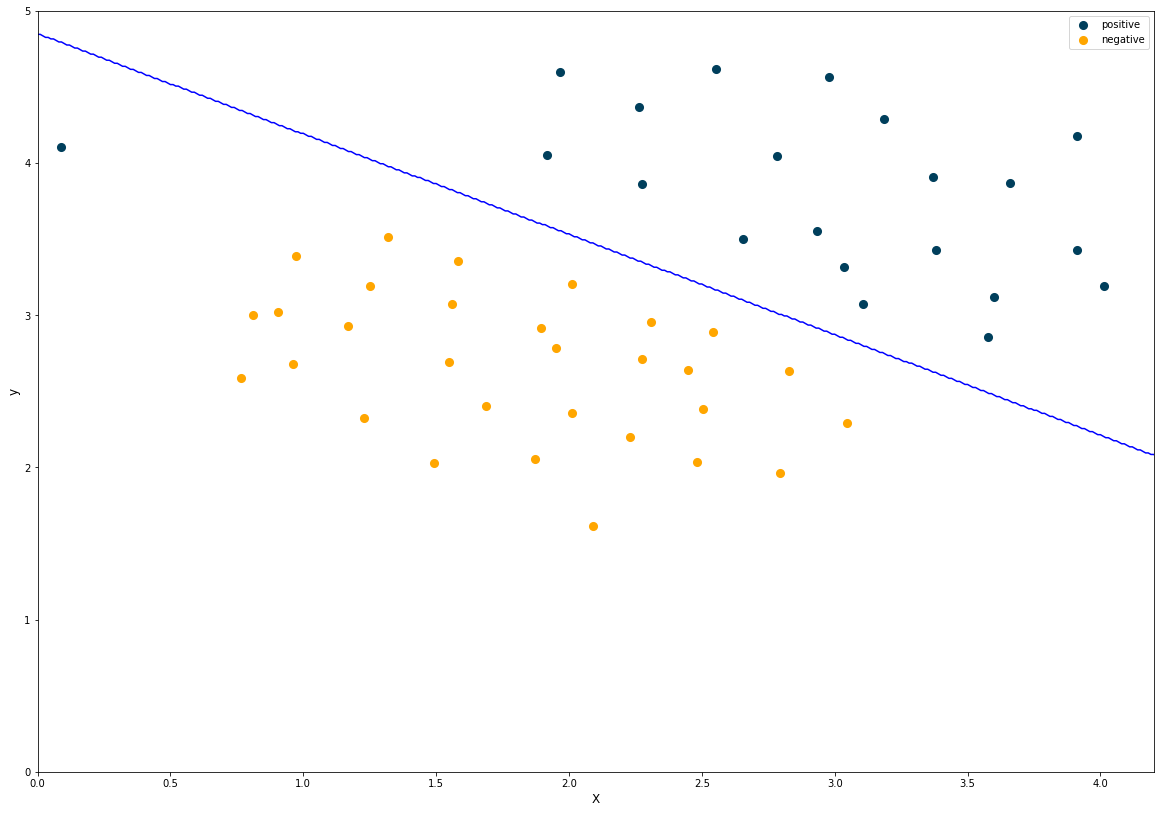

In [6]:
from sklearn import svm
# using c=1
clf = svm.SVC(kernel="linear", C=1.0, decision_function_shape="ovr")
clf.fit(X,Y.ravel())

#plot data
plotdata(X, Y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)


#plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')


**With large regularization(c=100)**

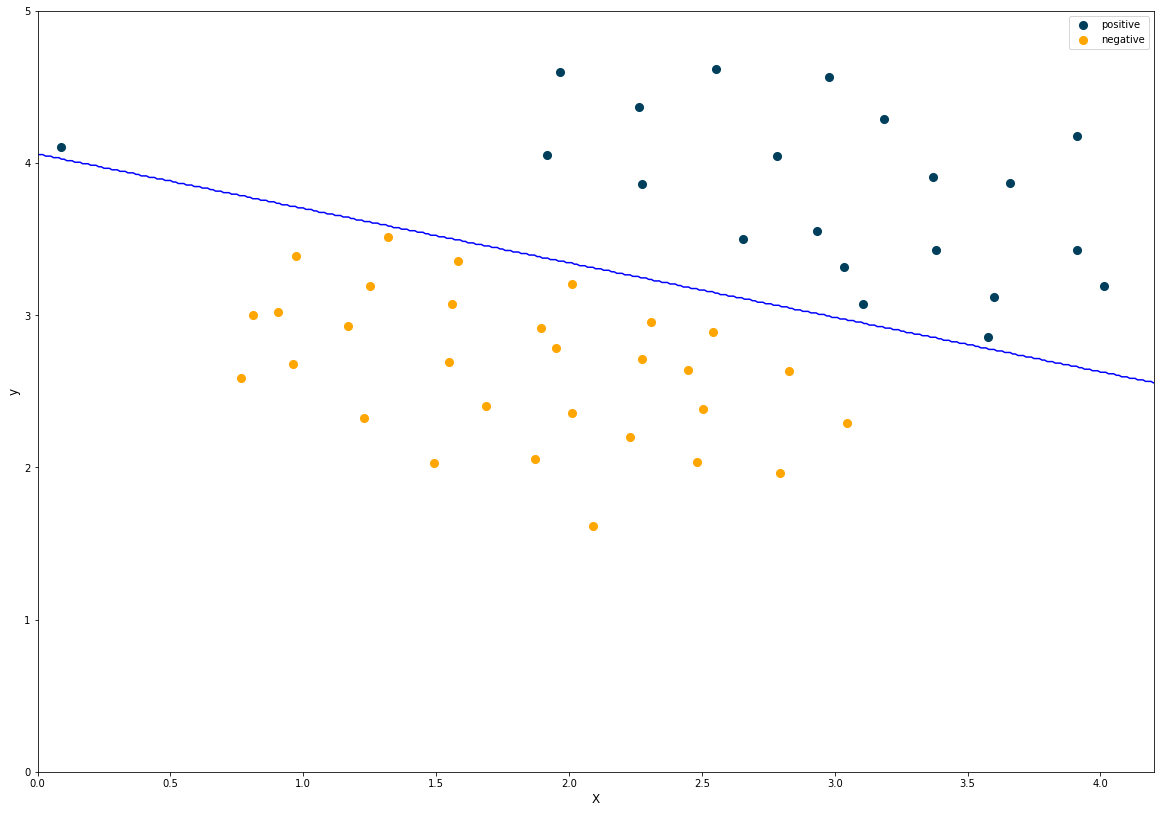

In [7]:
from sklearn import svm
# using c=100
clf = svm.SVC(kernel="linear", C=100.0, decision_function_shape="ovr")
clf.fit(X,Y.ravel())

#plot data
plotdata(X, Y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)


#plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')


In [0]:
X2 = data2["X"]
Y2 = data2["y"]

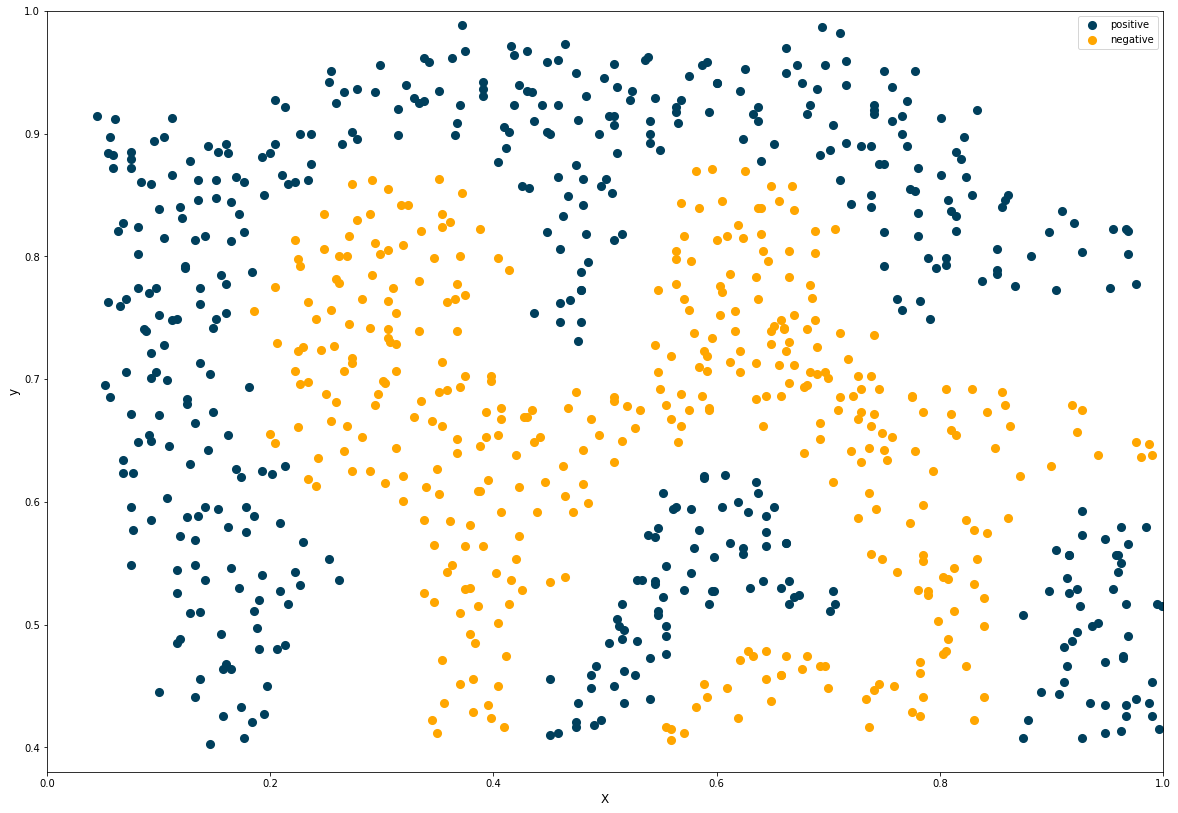

In [10]:
plotdata(X2, Y2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)

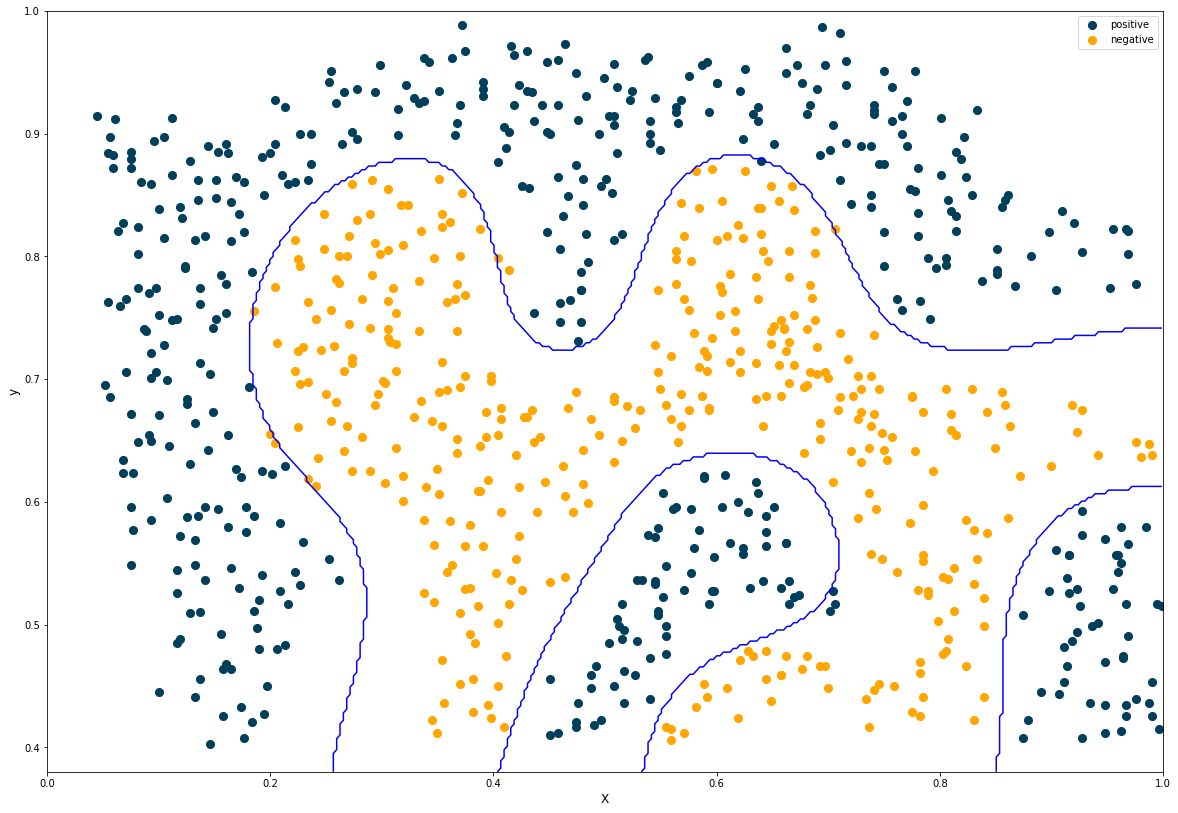

In [13]:
sigma = 0.1
gamma = 1/(2 * sigma**2)

clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X2, Y2.ravel())

plotdata(X2, Y2, 'X', 'y', 'positive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

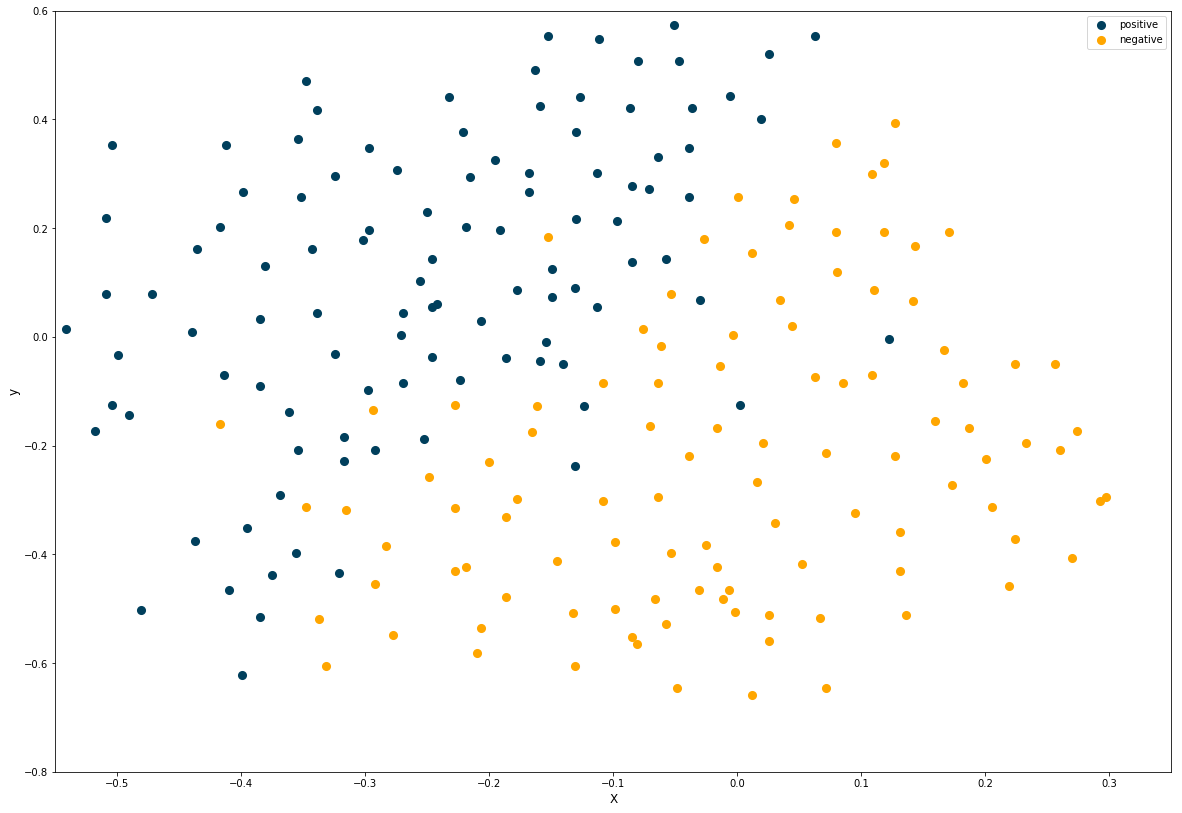

In [16]:
X3 = data3["X"]
Y3 = data3["y"]

plotdata(X3, Y3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

In [0]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X3, Y3.ravel())
        errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

In [18]:
index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is: {}'.format(sigma_max))
print('The optimal value of C is: {}'.format(c_max))

The optimal value of sigma is: 0.1
The optimal value of C is: 1


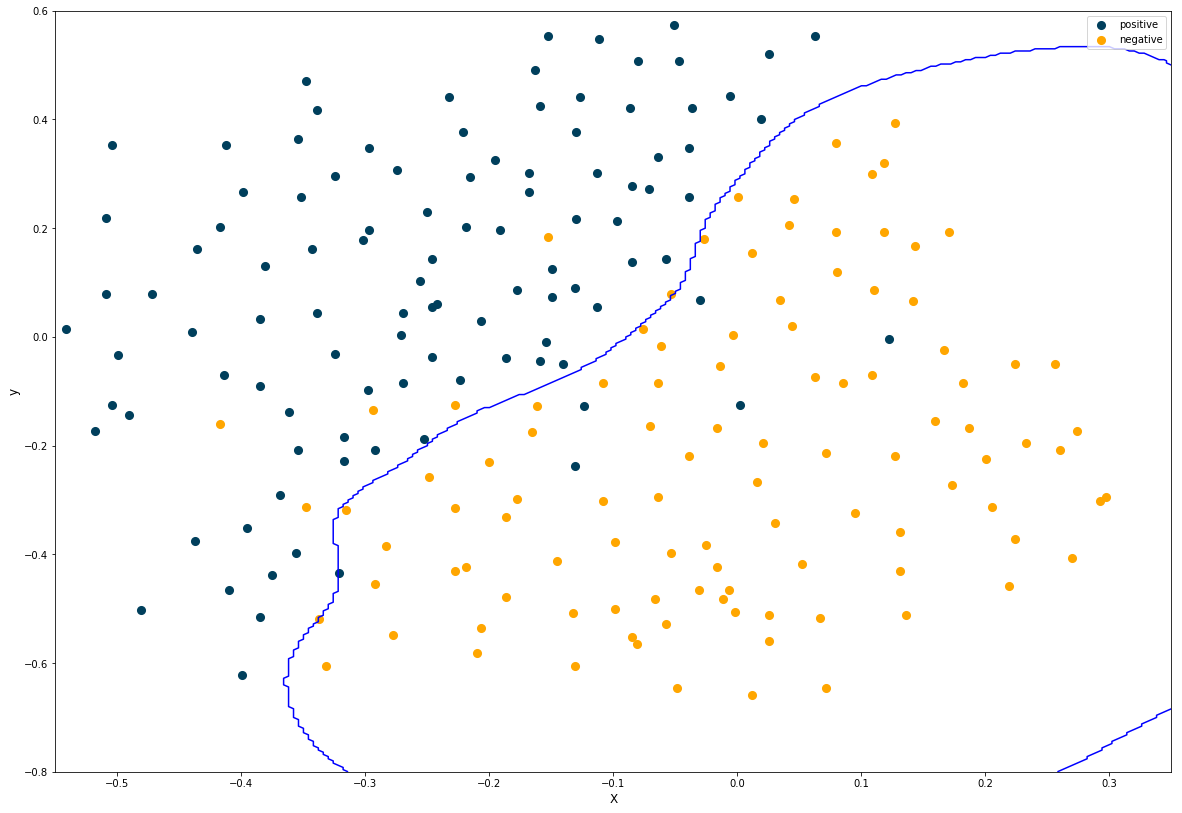

In [20]:
sigma= 0.1
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X3, Y3.ravel())

plotdata(X3, Y3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

**Spam classification**

In [26]:
c = 0.1
X_train = spam_train["X"]
Y_train = spam_train["y"]

X_test = spam_test["Xtest"]
Y_test = spam_test["ytest"]

clf_spam = svm.SVC(kernel = 'linear', C = 0.1, decision_function_shape = 'ovr')
clf_spam.fit(X_train, Y_train.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
train_acc = clf_spam.score(X_train,Y_train.ravel())
test_acc = clf_spam.score(X_test,Y_test.ravel())

In [31]:
print("training accuracy: ",train_acc)
print("testing accuracy: ",test_acc)

training accuracy:  0.99825
testing accuracy:  0.989
